In [ ]:
# Getting the Dataset to Colab

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls "/content/drive/MyDrive/CropDiseaseDetection"

'0a0fe942-bb9e-4384-8466-779017d00bcf___UF.GRC_YLCV_Lab 02192.JPG'
 plantdisease.zip


In [ ]:
zip_path = "/content/drive/MyDrive/CropDiseaseDetection/plantdisease.zip"
extract_path = "/content/dataset"

In [ ]:
import zipfile

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

In [ ]:
!ls /content/dataset

plantvillage  PlantVillage


In [ ]:
!ls /content/dataset/plantvillage

PlantVillage


In [ ]:
!ls /content/dataset/PlantVillage

Pepper__bell___Bacterial_spot  Tomato_Late_blight
Pepper__bell___healthy	       Tomato_Leaf_Mold
Potato___Early_blight	       Tomato_Septoria_leaf_spot
Potato___healthy	       Tomato_Spider_mites_Two_spotted_spider_mite
Potato___Late_blight	       Tomato__Target_Spot
Tomato_Bacterial_spot	       Tomato__Tomato_mosaic_virus
Tomato_Early_blight	       Tomato__Tomato_YellowLeaf__Curl_Virus
Tomato_healthy


In [ ]:
## Image Preprocessing using ImageDataGenerator

from tensorflow.keras.preprocessing.image import ImageDataGenerator

dataset_path = "/content/dataset/PlantVillage"

In [ ]:
# Image parameters
img_height, img_width = 128, 128  # Resize images to 128x128
batch_size = 32

In [ ]:
# Create ImageDataGenerator for training with augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,         # Normalize pixel values (0-1)
    validation_split=0.2,   # 20% data for validation
    shear_range=0.2,        # Augmentation: shear
    zoom_range=0.2,         # Augmentation: zoom
    horizontal_flip=True    # Augmentation: horizontal flip
)

In [ ]:
# Training data generator
train_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',    # for multi-class classification
    subset='training',           # set as training data
    shuffle=True
)

Found 16516 images belonging to 15 classes.


In [ ]:
# Validation data generator
validation_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',         # set as validation data
    shuffle=False
)

Found 4122 images belonging to 15 classes.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [ ]:
num_classes = 15  # As per the dataset

model = Sequential()
# 1st convolutional layer + max pooling
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)))
model.add(MaxPooling2D((2, 2)))

# 2nd convolutional layer + max pooling
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# 3rd convolutional layer + max pooling
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Flatten the 3D feature maps to 1D feature vectors
model.add(Flatten())

# Fully connected layer with 128 neurons
model.add(Dense(128, activation='relu'))

# Dropout to prevent overfitting
model.add(Dropout(0.5))

# Output layer with 'num_classes' neurons and softmax activation
model.add(Dense(num_classes, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 15)             │         1,935 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,306,575 (12.61 MB)

 Trainable params: 3,306,575 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(train_generator,validation_data=validation_generator,epochs=15)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
517/517 ━━━━━━━━━━━━━━━━━━━━ 112s 208ms/step - accuracy: 0.3364 - loss: 2.0510 - val_accuracy: 0.7380 - val_loss: 0.8102
Epoch 2/15
517/517 ━━━━━━━━━━━━━━━━━━━━ 100s 193ms/step - accuracy: 0.6459 - loss: 1.0714 - val_accuracy: 0.7310 - val_loss: 0.7773
Epoch 3/15
517/517 ━━━━━━━━━━━━━━━━━━━━ 98s 189ms/step - accuracy: 0.7044 - loss: 0.8865 - val_accuracy: 0.8365 - val_loss: 0.4985
Epoch 4/15
517/517 ━━━━━━━━━━━━━━━━━━━━ 98s 190ms/step - accuracy: 0.7464 - loss: 0.7502 - val_accuracy: 0.8122 - val_loss: 0.5609
Epoch 5/15
517/517 ━━━━━━━━━━━━━━━━━━━━ 101s 195ms/step - accuracy: 0.7566 - loss: 0.7161 - val_accuracy: 0.8510 - val_loss: 0.4331
Epoch 6/15
517/517 ━━━━━━━━━━━━━━━━━━━━ 99s 192ms/step - accuracy: 0.7873 - loss: 0.6190 - val_accuracy: 0.8544 - val_loss: 0.4215
Epoch 7/15
517/517 ━━━━━━━━━━━━━━━━━━━━ 100s 194ms/step - accuracy: 0.8181 - loss: 0.5433 - val_accuracy: 0.8799 - val_loss: 0.3717
Epoch 8/15
517/517 ━━━━━━━━━━━━━━━━━━━━ 100s 194ms/step - accuracy: 0.8283 - lo

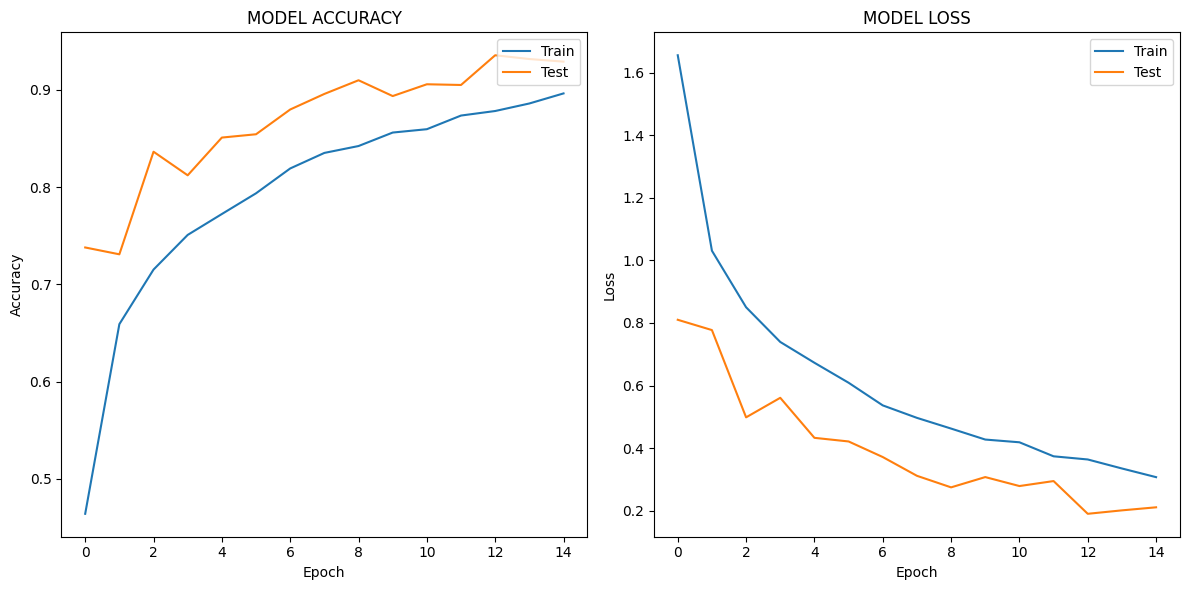

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("MODEL ACCURACY")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["Train","Test"],loc = "upper right")

# Visualizing training and validation loss values
plt.subplot(1,2,2)
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("MODEL LOSS")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["Train","Test"],loc="upper right")

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import seaborn as sns

In [ ]:
# Predict the labels for test set
y_pred_p = model.predict(validation_generator)
y_pred = np.argmax(y_pred_p, axis=1)

129/129 ━━━━━━━━━━━━━━━━━━━━ 20s 155ms/step


In [ ]:
# True labels
y_true = validation_generator.classes
class_labels = list(validation_generator.class_indices.keys())

In [ ]:
# Classification Report
print("Classification Report:\n")
print(classification_report(y_true, y_pred, target_names=class_labels))

Classification Report:

                                             precision    recall  f1-score   support

              Pepper__bell___Bacterial_spot       0.92      0.90      0.91       199
                     Pepper__bell___healthy       0.93      0.99      0.96       295
                      Potato___Early_blight       0.90      0.97      0.93       200
                       Potato___Late_blight       0.95      0.82      0.88       200
                           Potato___healthy       0.92      0.80      0.86        30
                      Tomato_Bacterial_spot       0.95      0.96      0.96       425
                        Tomato_Early_blight       0.90      0.73      0.80       200
                         Tomato_Late_blight       0.92      0.88      0.90       381
                           Tomato_Leaf_Mold       0.85      0.93      0.89       190
                  Tomato_Septoria_leaf_spot       0.89      0.92      0.90       354
Tomato_Spider_mites_Two_spotted_spider_m

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
cm

array([[179,   9,   4,   0,   0,   0,   0,   0,   0,   6,   0,   0,   1,
          0,   0],
       [  1, 293,   0,   0,   0,   0,   0,   0,   0,   1,   0,   0,   0,
          0,   0],
       [  0,   0, 194,   2,   0,   0,   1,   1,   1,   1,   0,   0,   0,
          0,   0],
       [  0,   0,  11, 164,   2,   2,   1,  15,   0,   0,   3,   1,   1,
          0,   0],
       [  0,   5,   0,   0,  24,   0,   0,   0,   1,   0,   0,   0,   0,
          0,   0],
       [  1,   0,   0,   0,   0, 409,   0,   0,   0,   0,   0,   3,  12,
          0,   0],
       [  2,   1,   2,   1,   0,  15, 146,   7,   5,   7,   1,   5,   7,
          0,   1],
       [  2,   1,   2,   5,   0,   1,  10, 336,   9,  11,   1,   0,   1,
          0,   2],
       [  1,   0,   0,   0,   0,   1,   0,   2, 176,   8,   0,   0,   2,
          0,   0],
       [  6,   3,   3,   0,   0,   1,   2,   0,  13, 324,   0,   0,   1,
          1,   0],
       [  1,   0,   0,   0,   0,   1,   0,   1,   0,   0, 300,  26,   2,
       

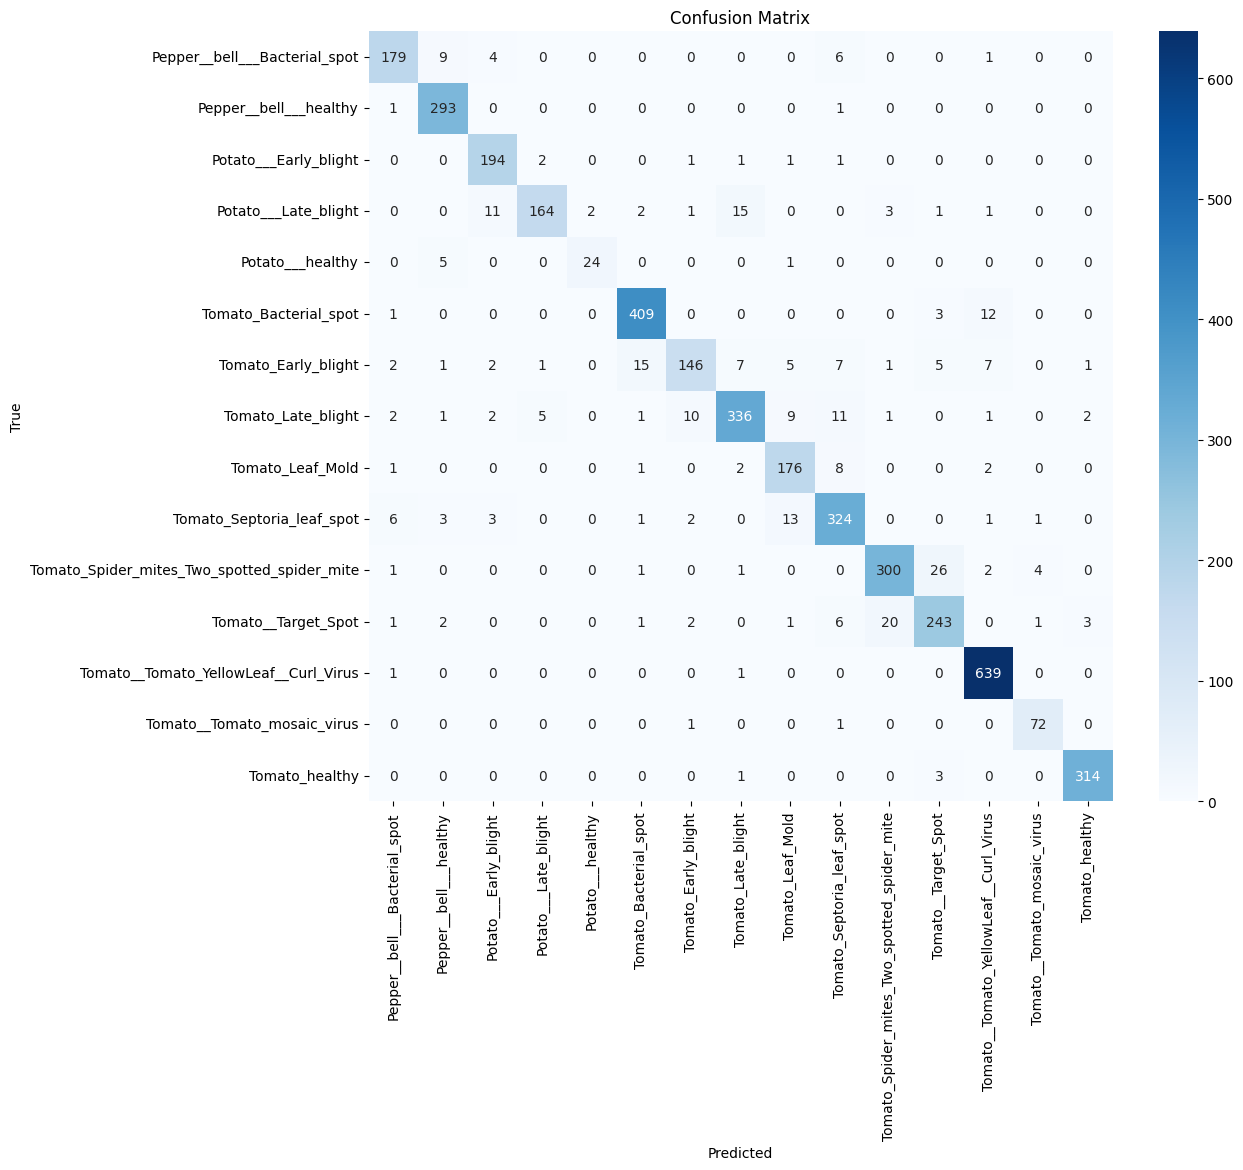

In [ ]:
# Plotting the confusion matrix
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_labels, yticklabels=class_labels, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from tensorflow.keras.models import load_model
model = load_model('cropdisease.h5')

In [ ]:
from tensorflow.keras.preprocessing import image

# Load and preprocess a new image
def predict_image(img_path):
    img = image.load_img(img_path, target_size=(128, 128))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0  # Normalize

    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction)
    class_labels = list(train_generator.class_indices.keys())

    print(f"Predicted Class: {class_labels[predicted_class]}")
    return class_labels[predicted_class]

In [ ]:
predict_image("/content/0a0fe942-bb9e-4384-8466-779017d00bcf___UF.GRC_YLCV_Lab 02192.JPG")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 558ms/step
Predicted Class: Tomato__Tomato_YellowLeaf__Curl_Virus


'Tomato__Tomato_YellowLeaf__Curl_Virus'

In [ ]:
predict_image("/content/download (1).jpeg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Predicted Class: Pepper__bell___Bacterial_spot


'Pepper__bell___Bacterial_spot'

In [ ]:
predict_image("/content/blackspot-plant-disease-1024x512.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Predicted Class: Potato___Early_blight


'Potato___Early_blight'

In [ ]:
model.save('cropdisease.h5')